In [77]:
%cd "D:\Users\sean.ogara\Documents\ons-energy-analysis"

d:\Users\sean.ogara\Documents\ons-energy-analysis


In [78]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

from src.visualisations.scatter_chart import scatter_chart

In [79]:
electricity_price_data = pd.read_csv("data/processed/global_electricity_household_prices.csv")
electricity_price_data.head()

,country,iso2,iso3,price
0,Lebanon,LB,LBN,0.001
1,Iran,IR,IRN,0.002
2,Syria,SY,SYR,0.004
3,Ethiopia,ET,ETH,0.005
4,Sudan,SD,SDN,0.007


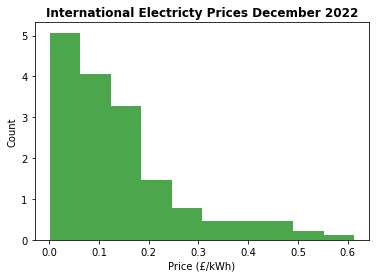

In [80]:
#distribution of prices
num_bins = 10
n, bins, patches = plt.hist(electricity_price_data['price'], num_bins,
                            density = 1,
                            color ='green',
                            alpha = 0.7)

plt.xlabel('Price (£/kWh)')
plt.ylabel('Count')
plt.title('International Electricty Prices December 2022',
          fontweight = 'bold')
plt.show()

In [81]:
#global mean price
global_mean_price = electricity_price_data['price'].mean()
global_mean_price

0.13707586206896552

In [82]:
#uk price
uk_price = electricity_price_data[electricity_price_data['iso2'] == 'GB']['price'].values[0]
uk_price

0.387

In [83]:
#ratio between uk and global mean
uk_price / global_mean_price

2.823254175890521

In [84]:
#bring in energy mix data
energy_mix_data = pd.read_csv("data/raw/owid-energy-data.csv")
energy_mix_data.tail()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
22007,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,NaN,NaN,NaN,NaN,25.910,...,0.218,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22008,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22009,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22010,Zimbabwe,2021,ZWE,15993525.0,NaN,NaN,NaN,NaN,NaN,23.760,...,0.498,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22011,Zimbabwe,2022,ZWE,16320539.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
#filter for 2021 as this is the most recent complete data
energy_mix_2021 = energy_mix_data.loc[energy_mix_data['year'] == 2021, :]
energy_mix_2021.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
21,ASEAN (Ember),2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.983,NaN,NaN,NaN,NaN,NaN,8.30,NaN,0.719,NaN
144,Afghanistan,2021,AFG,4.009946e+07,NaN,NaN,NaN,NaN,NaN,0.000,...,9.639,NaN,NaN,NaN,NaN,0.000,0.00,NaN,0.000,NaN
266,Africa,2021,NaN,1.393677e+09,NaN,27.27,0.238,0.796,1.11,2.705,...,2.040,0.835,19.233,9.431,59.609,14.989,20.89,42.771,2.489,1.062
324,Africa (EI),2021,NaN,NaN,NaN,27.27,0.238,NaN,1.11,NaN,...,1.996,0.835,19.233,9.432,59.609,NaN,22.78,NaN,2.540,1.062
347,Africa (Ember),2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.040,NaN,NaN,NaN,NaN,NaN,20.89,NaN,2.489,NaN


In [86]:
#fileter for columns of interest
cols_of_interest = [
                    'country', 
                    'year',
                    'iso_code',
                    'population',
                    'energy_per_capita',
                    'fossil_elec_per_capita',
                    'low_carbon_energy_per_capita',
                    'low_carbon_share_energy',
                    'gas_prod_per_capita',
                    'oil_prod_per_capita',
                    'gas_production',
                    'oil_production'
                    ]           
energy_mix_2021 = energy_mix_2021[cols_of_interest]

<AxesSubplot:>

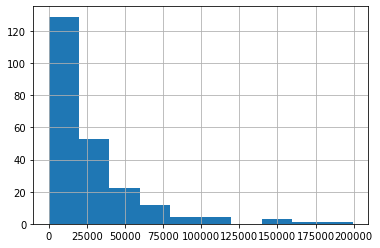

In [87]:
energy_mix_2021['energy_per_capita'].hist()

<AxesSubplot:>

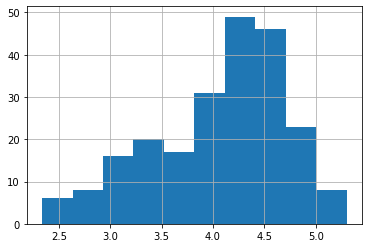

In [88]:
energy_mix_2021['energy_per_capita_log'] = np.log10(energy_mix_2021[energy_mix_2021['energy_per_capita'] != 0]['energy_per_capita'])
energy_mix_2021['energy_per_capita_log'].hist()


<AxesSubplot:>

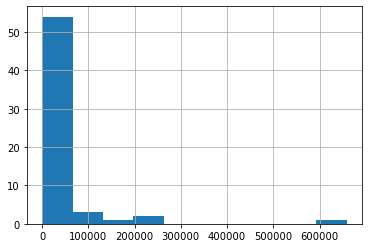

In [89]:
energy_mix_2021['gas_prod_per_capita'].hist()

<AxesSubplot:>

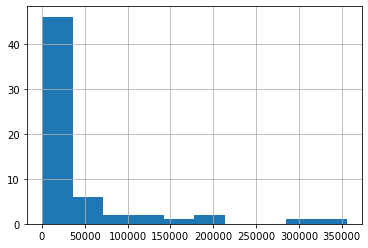

In [90]:
energy_mix_2021['oil_prod_per_capita'].hist()

<AxesSubplot:>

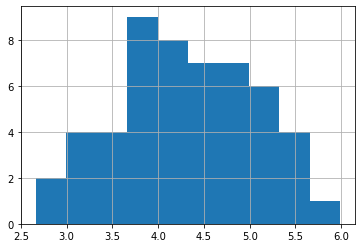

In [91]:
#combine oil and gas energy production per cap for total and log to make normally distributed
energy_mix_2021['oil_and_gas_prod_per_capita'] = energy_mix_2021['oil_prod_per_capita'] + energy_mix_2021['gas_prod_per_capita']
energy_mix_2021['oil_and_gas_prod_per_capita_log'] = np.log10(energy_mix_2021['oil_prod_per_capita'] + energy_mix_2021['gas_prod_per_capita'])
energy_mix_2021['oil_and_gas_prod_per_capita_log'].hist()

<AxesSubplot:>

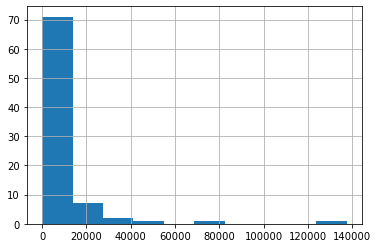

In [92]:
energy_mix_2021['low_carbon_energy_per_capita'].hist()

<AxesSubplot:>

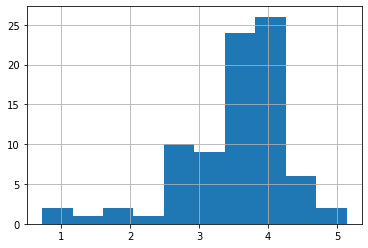

In [93]:
energy_mix_2021['low_carbon_energy_per_capita_log'] = np.log10(energy_mix_2021['low_carbon_energy_per_capita'])
energy_mix_2021['low_carbon_energy_per_capita_log'].hist()

In [113]:
#join on 2018 gdp data
joined_energy_data = pd.merge(left=energy_mix_data.loc[energy_mix_data['year'] == 2018, :][['iso_code', 'gdp']], right=energy_mix_2021, on='iso_code')
joined_energy_data['gdp_per_cap'] = joined_energy_data['gdp'] / joined_energy_data['population']
joined_energy_data['gdp_per_cap_log'] = np.log10(joined_energy_data['gdp'] / joined_energy_data['population'])


In [114]:
#join with price data
joined_energy_data = pd.merge(left=electricity_price_data[['iso3', 'price']], right=joined_energy_data, left_on='iso3', right_on='iso_code')

In [116]:
scatter_chart(data=joined_energy_data, x_var='gdp_per_cap_log', y_var='price', x_label='gdp', y_label='Price (£/kWh)', hover_labels='country')

In [96]:
scatter_chart(data=joined_energy_data, x_var='oil_and_gas_prod_per_capita_log', y_var='price', x_label='Oil and gas production per capita log(tWH)', y_label='Price (£/kWh)', hover_labels='country')

In [97]:
#global relationship of price against renewable share shows negative correlation, this could be caused by higher standards of leaving in countries with high renewable share
scatter_chart(data=joined_energy_data, x_var='low_carbon_share_energy', y_var='price', x_label='Low carbon energy share (%)', y_label='Price (£/kWh)', hover_labels='country')

In [98]:
#eu + uk only

europe_country_codes = [
    'GBR', 'AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 
    'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 
    'SVK', 'SVN', 'ESP', 'SWE'
]

#opposite trend is true for europe but weak relationship
scatter_chart(data=joined_energy_data[joined_energy_data['iso3'].isin(europe_country_codes)], x_var='low_carbon_share_energy', y_var='price', x_label='Low carbon energy share (%)', y_label='Price (£/kWh)', hover_labels='country')

In [99]:
#plot of price vs usage per cap, again this could be driven by higher standards of living driving up the prices in countries which use more energy
scatter_chart(data=joined_energy_data, x_var='energy_per_capita_log', y_var='price', x_label='Energy usage per capita log(tWH)', y_label='Price (£/kWh)', hover_labels='country')

In [100]:
#plan
#tidy up charts
#focus on renewable share, oil + gas prod, and energy usage per cap
#make regression model to explain price - does renewable mix matter?
#cluster countries based on 3/4 variables
#display 3 var results using 3d scatter (renewable share, oil + gas prod, price)
#display 4 var results on 2d plot using pca
#get avg values for each var and rough distributions (where is UK an outlier)
